<a href="https://colab.research.google.com/github/zdemirel/Heart-Failure-Project-Data-Mining/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zeynep DEMİREL 21040101014 Bilgisayar Mühendisliği Makine Öğrenmesi Projesi

# Veri Seti Tanımı

Pima Indians Diyabet Veri Seti, Pima Kızılderilileri üzerinde yapılan tıbbi test sonuçlarına dayanarak 5 yıl içinde diyabetin başlangıcını tahmin etmeyi amaçlayan bir veri setidir. Bu veri seti, 768 gözlem ve 8 girdi değişkeni ile 1 çıktı değişkeni içerir. Sınıflandırma probleminde kullanılan bu veri setinde, sınıflar dengeli değildir ve her bir sınıf için gözlem sayıları farklıdır. Değişkenler, hamilelik sayısı, oral glukoz tolerans testinde 2 saatlik plazma glukoz konsantrasyonu, diyastolik kan basıncı, triceps deri kıvrım kalınlığı, 2 saatlik serum insulin düzeyi, vücut kitle indeksi, diyabet soy ağacı fonksiyonu ve yaş gibi tıbbi ölçümleri içerir. Bu veri setindeki eksik değerlerin, sıfır değerleriyle kodlandığı düşünülmektedir.

# Veri Seti Yükleme ve Normalizasyon İşlemleri



In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB

In [101]:
data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


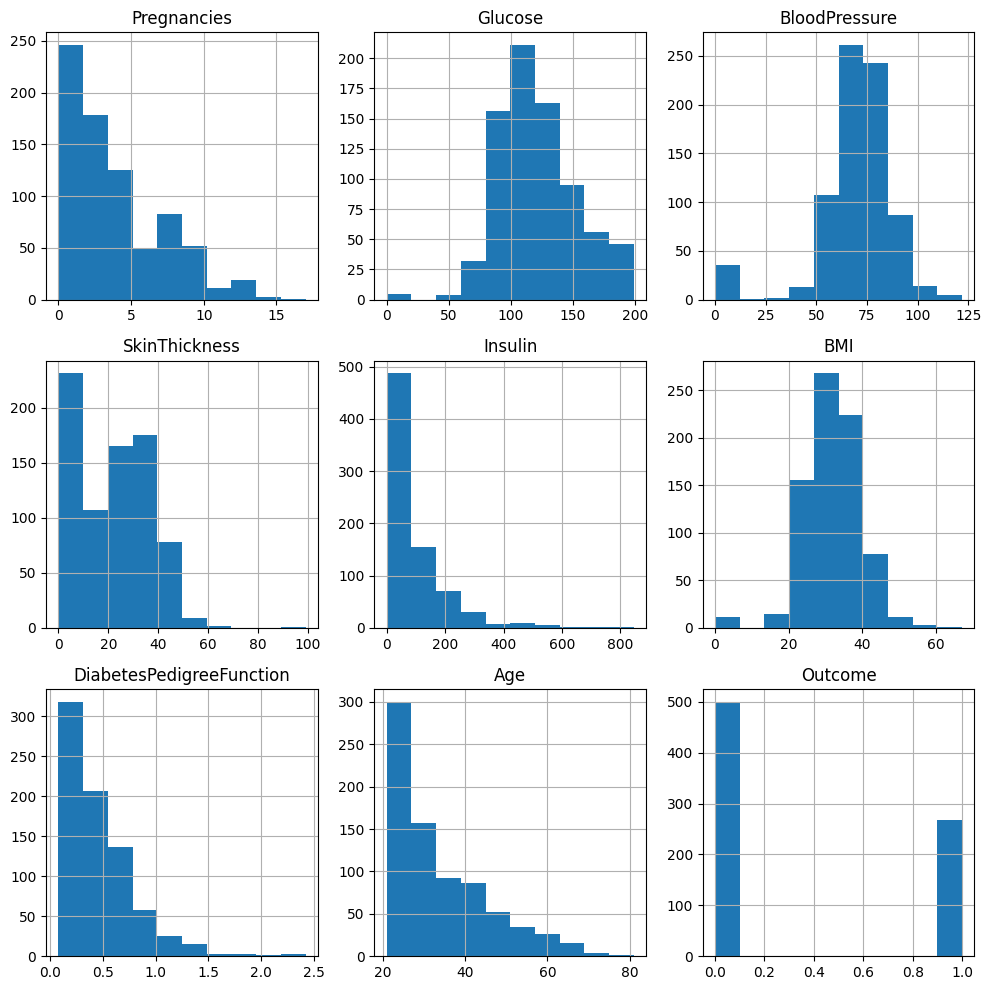

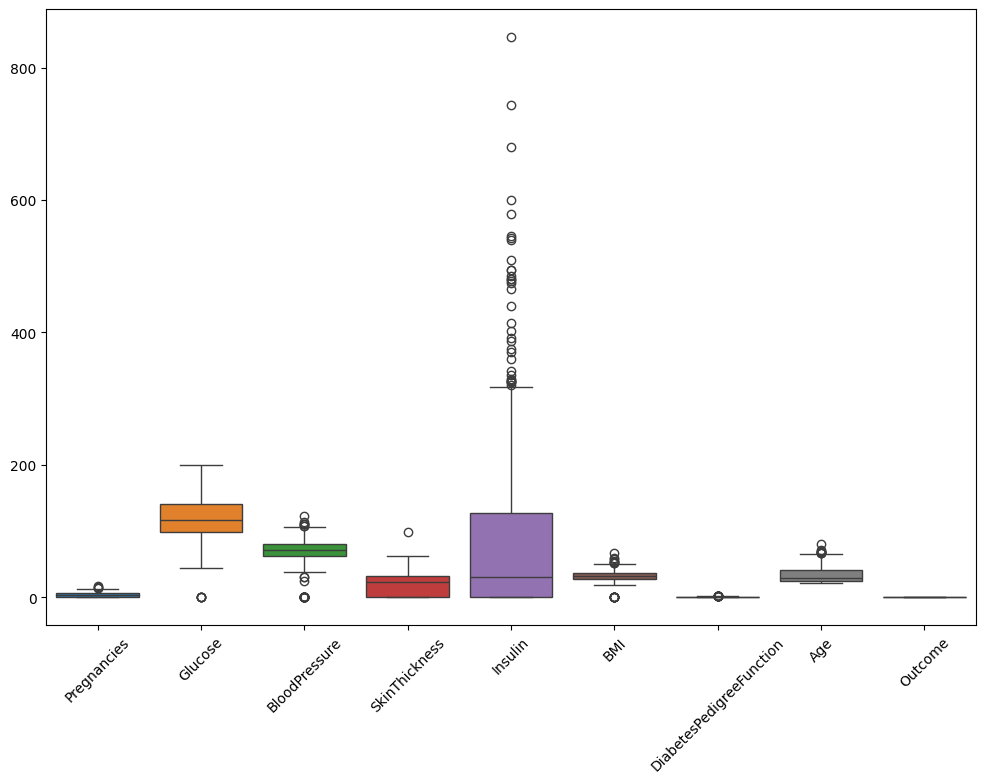

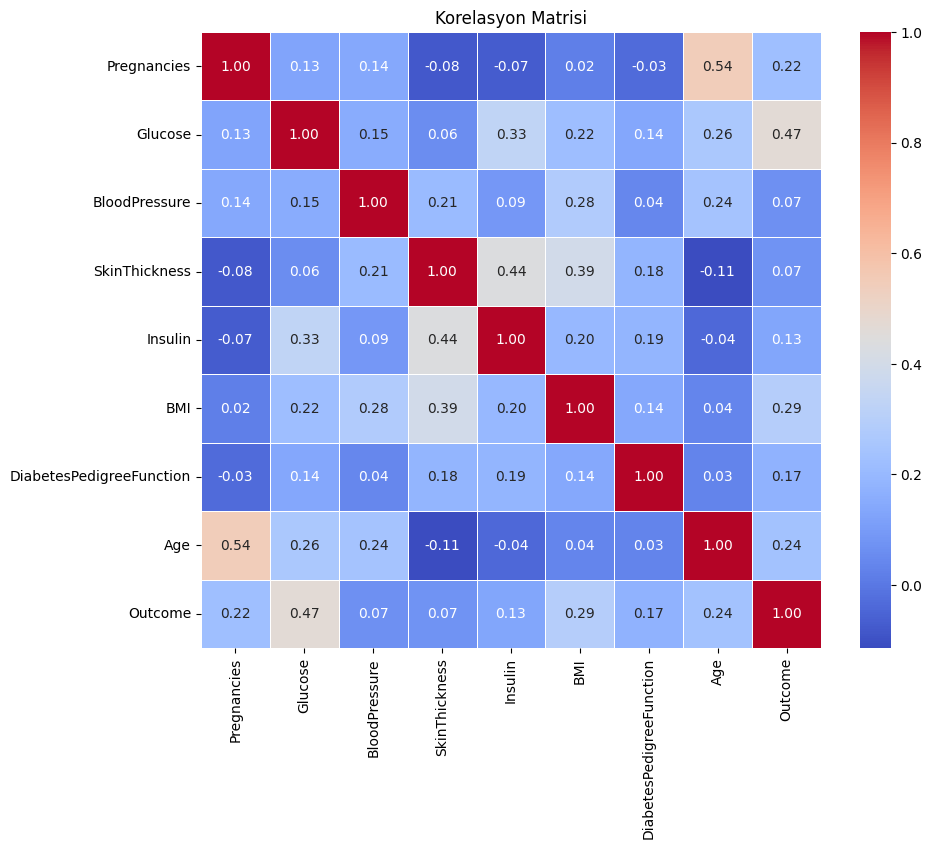

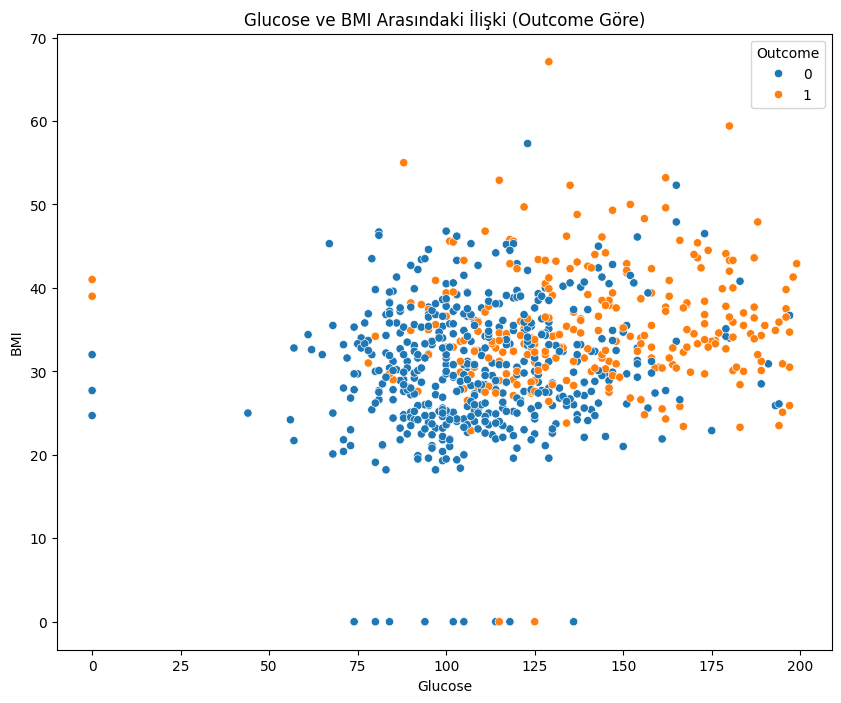

In [102]:
# Histogramlarla değişken dağılımlarını görselleştirme
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

# Kutu grafiğiyle değişkenler arasındaki ilişkiyi görselleştirme
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

# Sıcaklık haritası ile korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

# Outcome değişkenine göre Glucose ve BMI arasındaki ilişkiyi gösteren nokta grafiği
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data)
plt.title('Glucose ve BMI Arasındaki İlişki (Outcome Göre)')
plt.show()

Tablodaki veri seti, diyabet hastalarının bazı demografik ve klinik özelliklerini içerir. Bu özellikler arasında hamilelik sayısı, glukoz seviyeleri, kan basıncı, deri kalınlığı, insülin seviyeleri, vücut kitle indeksi (BMI), diyabet kalıtsal geçmiş fonksiyonu ve yaş bulunur. Bu veri setini incelediğimizde, 768 farklı bireye ait 9 değişken olduğunu görüyoruz.

İlk olarak, veri setini histogramlar kullanarak görselleştirdik. Bu histogramlar, her değişkenin dağılımını gösterir. Örneğin, Glukoz, Kan Basıncı ve BMI gibi değişkenlerin normal dağılıma yakın olduğunu, ancak Bazal Metabolizma Hızı gibi değişkenlerin ise sağa çarpık olduğunu gözlemliyoruz. Bu dağılımlar, veri setindeki değişkenlerin karakteristiklerini anlamamıza yardımcı olur.

Daha sonra, kutu grafiği kullanarak değişkenler arasındaki ilişkiyi inceledik. Bu grafiği kullanarak, her değişkenin minumum, maksimum, medyan, çeyrekler ve aykırı değerler gibi istatistiksel özelliklerini görebiliriz. Örneğin, İnsülin ve Deri Kalınlığı gibi değişkenlerde aykırı değerlerin bulunduğunu gözlemliyoruz.

Korelasyon matrisi, değişkenler arasındaki ilişkileri daha ayrıntılı olarak incelememizi sağlar. Bu matris, her değişkenin diğer değişkenlerle olan korelasyon katsayısını gösterir. Özellikle Glukoz ve BMI arasında yüksek bir pozitif korelasyon olduğunu ve yaş ile diğer değişkenler arasında daha zayıf bir ilişki olduğunu görüyoruz.

Son olarak, Outcome değişkenine göre Glukoz ve BMI arasındaki ilişkiyi gösteren bir nokta grafiği oluşturduk. Bu grafiği kullanarak, diyabet teşhisi alan ve almayan bireyler arasındaki Glukoz ve BMI ilişkisinin nasıl farklılaştığını görebiliriz. Görselleştirmeler, veri setinin derinlemesine analizini yapmamıza ve verilerin anlamını daha iyi kavramamıza yardımcı olur.

In [103]:
# Özellikler ve hedef değişkeni ayır
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [104]:
# Veri Seti Üzerinde Normalizasyon işlemi
scaler = MinMaxScaler()
outcome_column = data['Outcome']
data_normalized = data.drop('Outcome', axis=1)
data_normalized = scaler.fit_transform(data_normalized)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns[:-1])
data_normalized['Outcome'] = outcome_column
print(data_normalized)

# Veri setini öznitelik ve hedef değişken olarak ayarlama
X = data_normalized.drop('Outcome', axis=1)
y = data_normalized['Outcome']

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age


Bu normalizasyon işlemi, veri setindeki her bir özelliğin (değişkenin) değerlerini belirli bir aralığa ölçeklendirme işlemidir. Genellikle 0 ile 1 arasında veya -1 ile 1 arasına ölçeklendirme yapılır. Normalizasyon işlemi, farklı özelliklerin farklı ölçeklerde olması durumunda model performansını artırabilir ve özellikler arasında karşılaştırma yapmayı kolaylaştırabilir.

Yukarıdaki veri setinde, her bir özellik değeri, o özelliğin maksimum değerine bölünerek normalizasyon işlemi uygulanmıştır. Bu, veri setindeki her bir özellik için aynı ölçeklendirme yönteminin kullanıldığı anlamına gelir.

Örneğin, Glukoz özelliği için normalizasyon işlemi şu şekilde gerçekleştirilmiştir: Her bir Glukoz değeri, veri setindeki maksimum Glukoz değerine bölünmüştür. Bu, Glukoz değerlerini 0 ile 1 arasında bir aralığa ölçeklendirmiştir.

Normalizasyon işlemi, makine öğrenimi algoritmaları için veri hazırlama sürecinin önemli bir adımıdır. Bu işlem, özellikler arasındaki farklı ölçekleri dengeler ve algoritmanın daha iyi performans göstermesine yardımcı olur.

# PCA ve LDA ile Boyut İndirgeme İşlemi

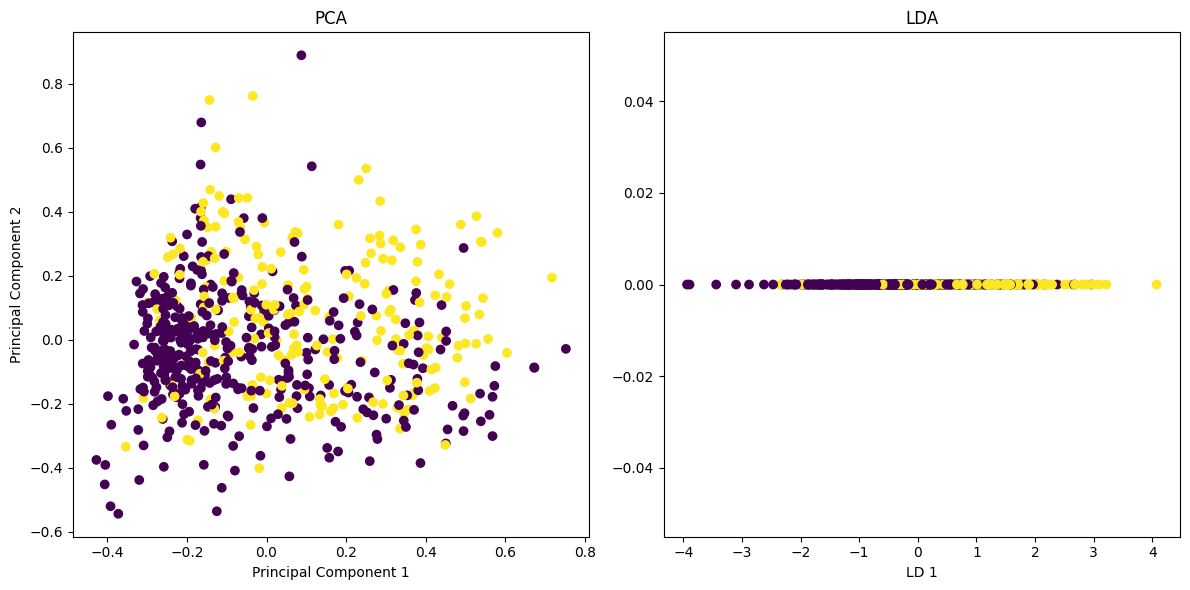

PCA için en yüksek iki öz değeri: [0.31285475 0.20632175]
LDA için en yüksek öz değer: [1.]


In [105]:
# Veri setini eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA uygulama
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# LDA uygulama
lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# En yüksek iki öz değeri seçme
top_two_pca = pca.explained_variance_ratio_[:2]
top_two_lda = lda.explained_variance_ratio_[:2]

# Boyut indirgeme sonuçlarını görselleştirme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_train_lda, np.zeros_like(X_train_lda), c=y_train, cmap='viridis')
plt.title('LDA')
plt.xlabel('LD 1')

plt.tight_layout()
plt.show()

# Öznitelik seçimi için PCA ve LDA'nın etkinliğini karşılaştırma
print("PCA için en yüksek iki öz değeri:", top_two_pca)
print("LDA için en yüksek öz değer:", top_two_lda)

PCA Öznitelik Ağırlıkları:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.653489  0.257512       0.215066      -0.080569 -0.004782  0.037487   
1    -0.127161  0.384862       0.290050       0.573739  0.485478  0.312098   
2     0.353450 -0.700740       0.298855       0.479391 -0.123989  0.136591   
3     0.426865 -0.074694      -0.747904       0.188825  0.186303 -0.076943   
4    -0.201848 -0.235476       0.219857      -0.135060 -0.307069 -0.016638   
5    -0.442711 -0.306370      -0.268800       0.280334  0.232764 -0.151027   
6    -0.112926  0.166512      -0.315754       0.187705 -0.567778  0.691181   
7     0.012377 -0.334537      -0.025527      -0.516526  0.493319  0.613021   

   DiabetesPedigreeFunction       Age  
0                  0.019713  0.672368  
1                  0.290463 -0.070298  
2                 -0.130220 -0.117975  
3                  0.399410 -0.130514  
4                  0.844060  0.173854  
5                 -0.135080  0

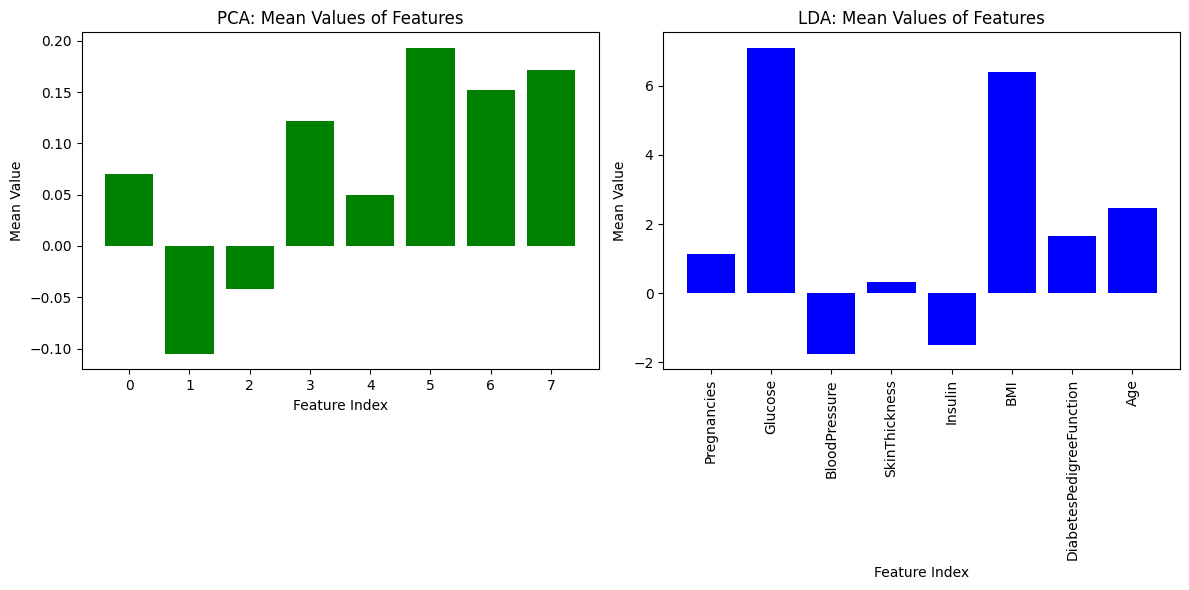

In [106]:
# PCA'dan öznitelik ağırlıklarını alma
pca_components = pd.DataFrame(pca.components_, columns=X.columns)
print("PCA Öznitelik Ağırlıkları:")
print(pca_components)

# LDA'dan öznitelik ağırlıklarını alma
lda_components = pd.DataFrame(lda.coef_.T, columns=['LD1'], index=X.columns)
print("\nLDA Öznitelik Ağırlıkları:")
print(lda_components)

# Sınıflar arasındaki farkı görselleştirme
plt.figure(figsize=(12, 6))

#PCA
plt.subplot(1, 2, 1)
pca_mean = pca_components.mean(axis=0)
plt.bar(range(len(pca_mean)), pca_mean, color='green')
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.title('PCA: Mean Values of Features')
plt.tight_layout()

# LDA
plt.subplot(1, 2, 2)
for feature in lda_components.index:
    plt.bar(feature, lda_components.loc[feature, 'LD1'], color='blue')
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.title('LDA: Mean Values of Features')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()



PCA ve LDA, boyut indirgeme ve öznitelik çıkarımı için kullanılan farklı tekniklerdir ve her biri veri setindeki değişkenlerin farklı yönlerini vurgular. Elde edilen sonuçlara göre, PCA'nın en yüksek iki öz değeri sırasıyla 0.3129 ve 0.2063 iken, LDA'nın en yüksek öz değeri 1'dir.

PCA'nın öznitelik ağırlıklarına baktığımızda, en yüksek varyansı (PCA'nın ana bileşenleri) hesaplayan bir teknik olduğunu görüyoruz. Özellikle, Glukoz, Gebelikler ve Yaş gibi özniteliklerin yüksek ağırlıkları olduğu göze çarpıyor. Bu, bu özniteliklerin veri setindeki değişkenliğin büyük bir kısmını açıkladığını ve dolayısıyla sınıfları ayırt etme yeteneklerinin yüksek olduğunu düşündürebilir.

Öte yandan, LDA, sınıflar arasındaki ayrımı en iyi şekilde optimize eden bir tekniktir. LDA'nın öznitelik ağırlıklarına baktığımızda, Glukoz, Vücut Kitle İndeksi (BMI), Yaş ve Diabetes Pedigree Fonksiyonu gibi özniteliklerin belirgin bir şekilde ayrıldığını görüyoruz. Özellikle, Glukoz ve BMI gibi özniteliklerin sınıfları ayırt etme yeteneklerinin yüksek olduğu görülmektedir.

Sonuç olarak, PCA daha çok değişkenliği korurken, LDA sınıflar arasındaki ayrımı maksimize eder. Bu bağlamda, PCA'nın ana bileşenleri genellikle değişkenliği en iyi şekilde temsil ederken, LDA'nın öznitelik ağırlıkları doğrudan sınıflar arasındaki ayrımı en iyi şekilde yansıtır. Bu nedenle, PCA'nın genel veri yapısını anlamak için kullanılabileceği, ancak sınıfları ayırt etmek için LDA'nın daha uygun olduğu sonucuna varılabilir. Bu analiz, modelleme aşamasında hangi özniteliklerin daha etkili olabileceğini belirlemek için önemlidir.








# Çoklu Doğrusal Regresyon ve Multinominal Lojistik Regresyon Analizleri

### Ana Veri Seti İçin:



Çoklu Doğrusal Regresyon Katsayıları:
[ 0.15289704  1.14258012 -0.20875965 -0.02506763 -0.10701828  1.08524008
  0.17073575  0.37587029]

Çoklu Doğrusal Regresyon Performansı:
Confusion Matrix:
 [[121  30]
 [ 32  48]]
Accuracy Score: 0.7316017316017316
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231


Multinominal Lojistik Regresyon Katsayıları:
[[ 0.4505206   2.65118931 -0.24999553  0.03039025 -0.06304149  2.16599472
   0.45399225  0.90638614]]

Multinominal Lojistik Regresyon Performansı:
Confusion Matrix:
 [[124  27]
 [ 34  46]]
Accuracy Score: 0.7359307359307359
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80   

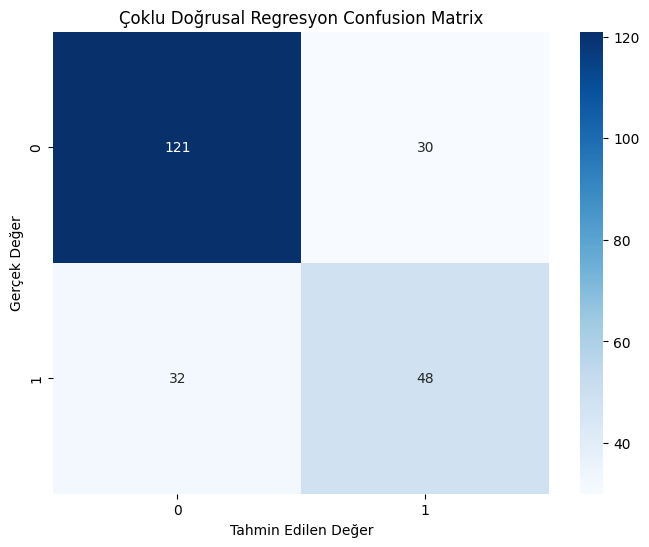

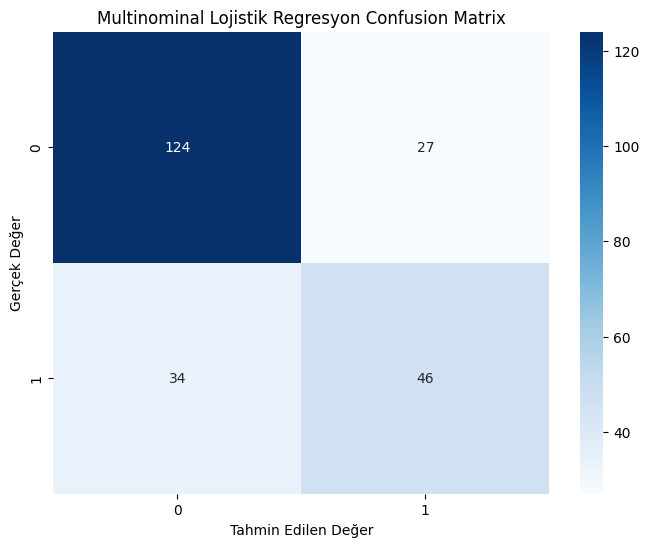

In [107]:
# Veri setini yükleme
data = pd.read_csv("diabetes.csv")

# Normalizasyon
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data.columns[:-1]] = scaler.fit_transform(data_normalized[data.columns[:-1]])

# Veri setini öznitelik ve hedef değişken olarak ayarlama
X = data_normalized.drop('Outcome', axis=1)
y = data_normalized['Outcome']

# Veri setini rastgele olarak %70 eğitim %30 test olacak şekilde ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon analizi
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Katsayıları raporlama
print("Çoklu Doğrusal Regresyon Katsayıları:")
print(linear_reg_model.coef_)

# Tahminler yapma
linear_reg_predictions = linear_reg_model.predict(X_test)

# Çoklu Doğrusal Regresyon performansını değerlendirme
print("\nÇoklu Doğrusal Regresyon Performansı:")
print("Confusion Matrix:\n", confusion_matrix(y_test, linear_reg_predictions.round()))
print("Accuracy Score:", accuracy_score(y_test, linear_reg_predictions.round()))
print("Classification Report:\n", classification_report(y_test, linear_reg_predictions.round()))

# Multinominal Lojistik Regresyon analizi
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_reg_model.fit(X_train, y_train)

# Katsayıları raporlama
print("\nMultinominal Lojistik Regresyon Katsayıları:")
print(logistic_reg_model.coef_)

# Tahminler yapma
logistic_reg_predictions = logistic_reg_model.predict(X_test)

# Multinominal Lojistik Regresyon performansını değerlendirme
print("\nMultinominal Lojistik Regresyon Performansı:")
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_reg_predictions))
print("Accuracy Score:", accuracy_score(y_test, logistic_reg_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_reg_predictions))

# Çoklu Doğrusal Regresyon confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, linear_reg_predictions.round()), annot=True, fmt="d", cmap="Blues")
plt.title("Çoklu Doğrusal Regresyon Confusion Matrix")
plt.xlabel("Tahmin Edilen Değer")
plt.ylabel("Gerçek Değer")
plt.show()

# Multinominal Lojistik Regresyon confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, logistic_reg_predictions), annot=True, fmt="d", cmap="Blues")
plt.title("Multinominal Lojistik Regresyon Confusion Matrix")
plt.xlabel("Tahmin Edilen Değer")
plt.ylabel("Gerçek Değer")
plt.show()

Bu kod bloğunda, iki farklı regresyon modeli olan Çoklu Doğrusal Regresyon ve Multinominal Lojistik Regresyon kullanılarak diyabet teşhisi yapılıyor ve modellerin performansı değerlendiriliyor.

Çoklu Doğrusal Regresyon modeli için, katsayılar incelendiğinde, her bir öznitelik için bir katsayı elde edilir. Bu katsayılar, her bir özniteliğin hedef değişken üzerindeki etkisini gösterir. Örneğin, Glukoz (1.1426) ve BMI (1.0852) öznitelikleri, diğer özniteliklere göre daha yüksek katsayılara sahiptir, bu da bu özniteliklerin hedef değişken üzerinde daha büyük bir etkiye sahip olduğunu gösterir. Modelin performansı değerlendirildiğinde, %73.16'lık bir doğruluk oranı elde edilir. Confusion matrix, modelin gerçek ve tahmin edilen değerler arasındaki karşılaştırmayı gösterir. Modelin doğruluk oranı, hassasiyet, geri çağırma ve f1-skoru gibi metriklerle ayrıntılı bir şekilde değerlendirilmiştir.

Multinominal Lojistik Regresyon modelinde ise, aynı şekilde öznitelik katsayıları incelenir. Bu modelde de Glukoz (2.6512) ve BMI (2.1660) gibi özniteliklerin, diğer özniteliklere göre daha yüksek katsayılara sahip olduğu görülür. Çoklu Doğrusal Regresyon modeliyle karşılaştırıldığında, Multinominal Lojistik Regresyon modelinin doğruluk oranı biraz daha yüksektir (%73.59). Confusion matrix ve sınıflandırma raporu da bu modelin performansını değerlendirmek için kullanılmıştır.

### PCA Uygulanmış Transformasyon Öznitelik Matrisi için:

PCA ile Çoklu Doğrusal Regresyon Katsayıları:
[ 0.65854803  0.69318106 -0.64410025 -0.00704749 -0.15403592 -0.37233414
  1.06789158 -0.31757113]

PCA ile Çoklu Doğrusal Regresyon Performansı:
Confusion Matrix:
 [[121  30]
 [ 32  48]]
Accuracy Score: 0.7316017316017316
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231


PCA ile Multinominal Lojistik Regresyon Katsayıları:
[[ 1.644754    1.70184873 -1.43693869 -0.04524123 -0.34621016 -0.81721632
   2.06358904 -0.55160832]]

PCA ile Multinominal Lojistik Regresyon Performansı:
Confusion Matrix:
 [[124  27]
 [ 34  46]]
Accuracy Score: 0.7359307359307359
Classification Report:
               precision    recall  f1-score   support

           0  

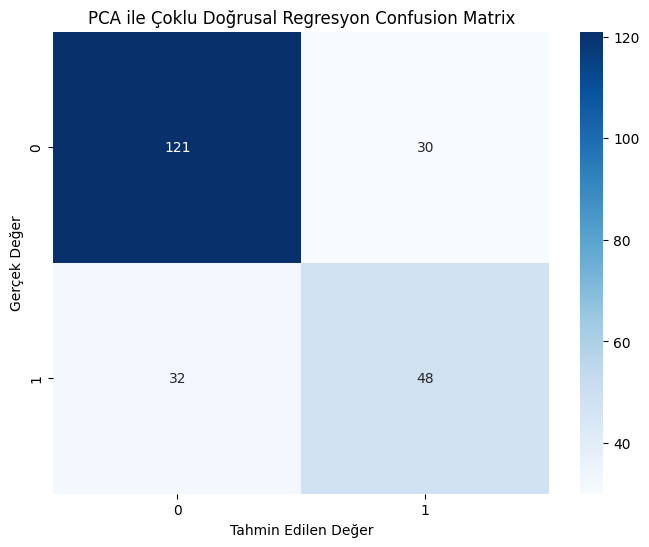

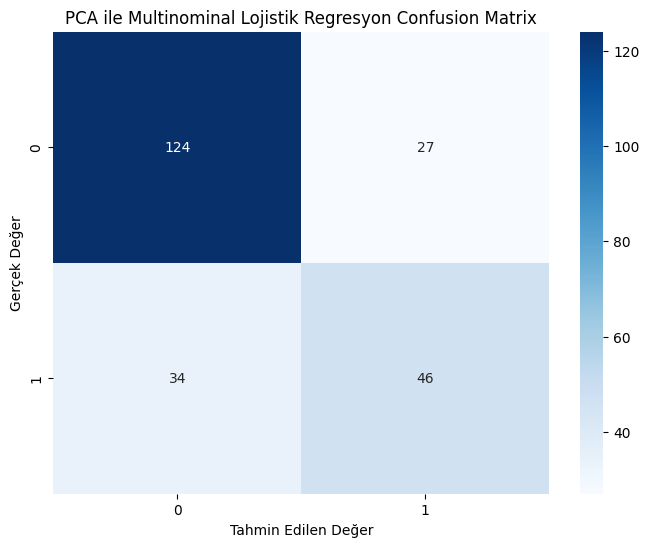

In [108]:
# Veri setini yükleme
data = pd.read_csv("diabetes.csv")

# Normalizasyon
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data.columns[:-1]] = scaler.fit_transform(data_normalized[data.columns[:-1]])

# Veri setini öznitelik ve hedef değişken olarak ayarlama
X = data_normalized.drop('Outcome', axis=1)
y = data_normalized['Outcome']

# Veri setini rastgele olarak %70 eğitim %30 test olacak şekilde ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PCA uygulama
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Çoklu Doğrusal Regresyon analizi
linear_reg_model_pca = LinearRegression()
linear_reg_model_pca.fit(X_train_pca, y_train)

# Katsayıları raporlama
print("PCA ile Çoklu Doğrusal Regresyon Katsayıları:")
print(linear_reg_model_pca.coef_)

# Tahminler yapma
linear_reg_predictions_pca = linear_reg_model_pca.predict(X_test_pca)

# Çoklu Doğrusal Regresyon performansını değerlendirme
print("\nPCA ile Çoklu Doğrusal Regresyon Performansı:")
print("Confusion Matrix:\n", confusion_matrix(y_test, linear_reg_predictions_pca.round()))
print("Accuracy Score:", accuracy_score(y_test, linear_reg_predictions_pca.round()))
print("Classification Report:\n", classification_report(y_test, linear_reg_predictions_pca.round()))

# Multinominal Lojistik Regresyon analizi
logistic_reg_model_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_reg_model_pca.fit(X_train_pca, y_train)

# Katsayıları raporlama
print("\nPCA ile Multinominal Lojistik Regresyon Katsayıları:")
print(logistic_reg_model_pca.coef_)

# Tahminler yapma
logistic_reg_predictions_pca = logistic_reg_model_pca.predict(X_test_pca)

# Multinominal Lojistik Regresyon performansını değerlendirme
print("\nPCA ile Multinominal Lojistik Regresyon Performansı:")
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_reg_predictions_pca))
print("Accuracy Score:", accuracy_score(y_test, logistic_reg_predictions_pca))
print("Classification Report:\n", classification_report(y_test, logistic_reg_predictions_pca))

# Çoklu Doğrusal Regresyon confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, linear_reg_predictions_pca.round()), annot=True, fmt="d", cmap="Blues")
plt.title("PCA ile Çoklu Doğrusal Regresyon Confusion Matrix")
plt.xlabel("Tahmin Edilen Değer")
plt.ylabel("Gerçek Değer")
plt.show()

# Multinominal Lojistik Regresyon confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, logistic_reg_predictions_pca), annot=True, fmt="d", cmap="Blues")
plt.title("PCA ile Multinominal Lojistik Regresyon Confusion Matrix")
plt.xlabel("Tahmin Edilen Değer")
plt.ylabel("Gerçek Değer")
plt.show()


Bu kodda, önce veri seti PCA (Principal Component Analysis) kullanılarak boyut indirgeme işlemine tabi tutuldu. Daha sonra bu indirgenmiş veri kümesi üzerinde Çoklu Doğrusal Regresyon ve Multinominal Lojistik Regresyon modelleri eğitildi ve performansları değerlendirildi.

Çoklu Doğrusal Regresyon modeli, PCA uygulanmış veri kümesi üzerinde eğitildiğinde, her bir bileşen için katsayılar elde edilir. Bu katsayılar, her bir bileşenin hedef değişken üzerindeki etkisini gösterir. Performans değerlendirmesinde, modelin doğruluk oranı %73.16 olarak hesaplandı. Confusion matrix, modelin gerçek ve tahmin edilen değerler arasındaki karşılaştırmayı göstermektedir. Modelin doğruluk oranı, hassasiyet, geri çağırma ve f1-skoru gibi metriklerle ayrıntılı bir şekilde değerlendirildi.

Multinominal Lojistik Regresyon modeli için de aynı süreç uygulandı. PCA ile boyut indirgeme yapılmış veri seti üzerinde eğitilen modelin performansı değerlendirildi. Doğruluk oranı %73.59 olarak hesaplandı. Confusion matrix ve sınıflandırma raporu, modelin performansını detaylı olarak inceledi.

Her iki model için de, PCA uygulanmış veri setiyle eğitilen modellerin performansı, PCA uygulanmamış veri setiyle eğitilen modellerle benzerdir. Bu durum, PCA'nın veri setini etkili bir şekilde temsil edebildiğini ve model performansını koruyabildiğini gösterir. Sonuç olarak, PCA'nın boyut indirgeme yeteneği, model eğitiminde kullanılabilirliğini artırabilirken, aynı zamanda veri setindeki gürültüyü azaltabilir. Bu analiz, model performansını geliştirmek ve gereksiz karmaşıklığı azaltmak için etkili bir yöntem sunar.




# Karar Ağacı Sınıflandırma Algoritmasını Kullanarak Ağaç Yapısını ve Performans Metriklerini Hesaplama

### Ana Veri Seti için:

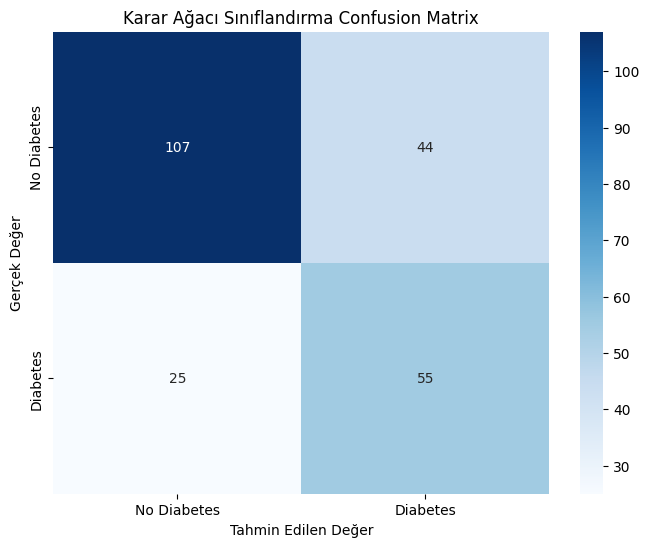

Karar Ağacı Sınıflandırma Performansı:
Accuracy Score: 0.7012987012987013
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



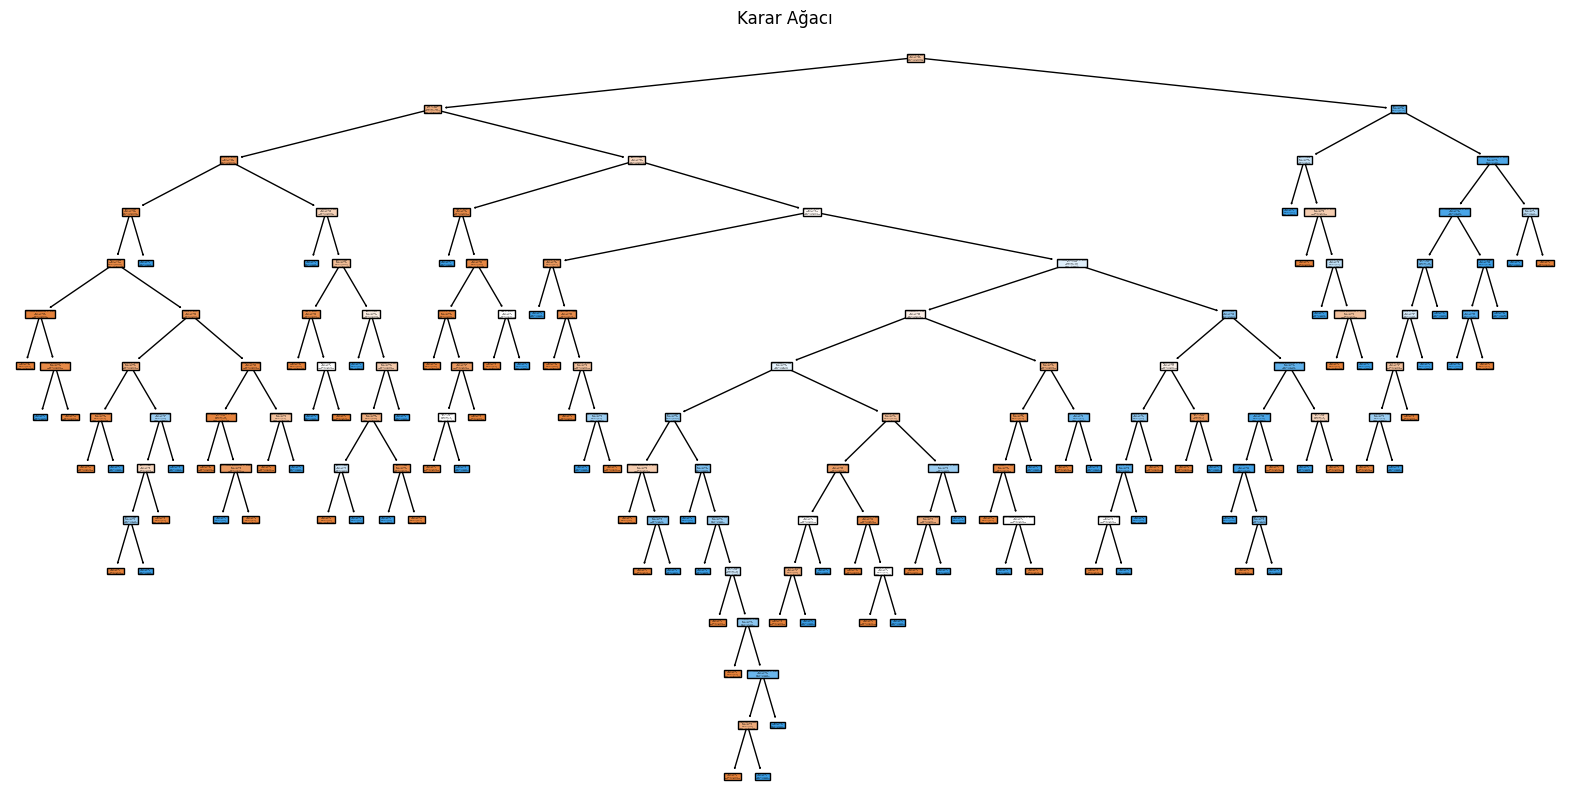

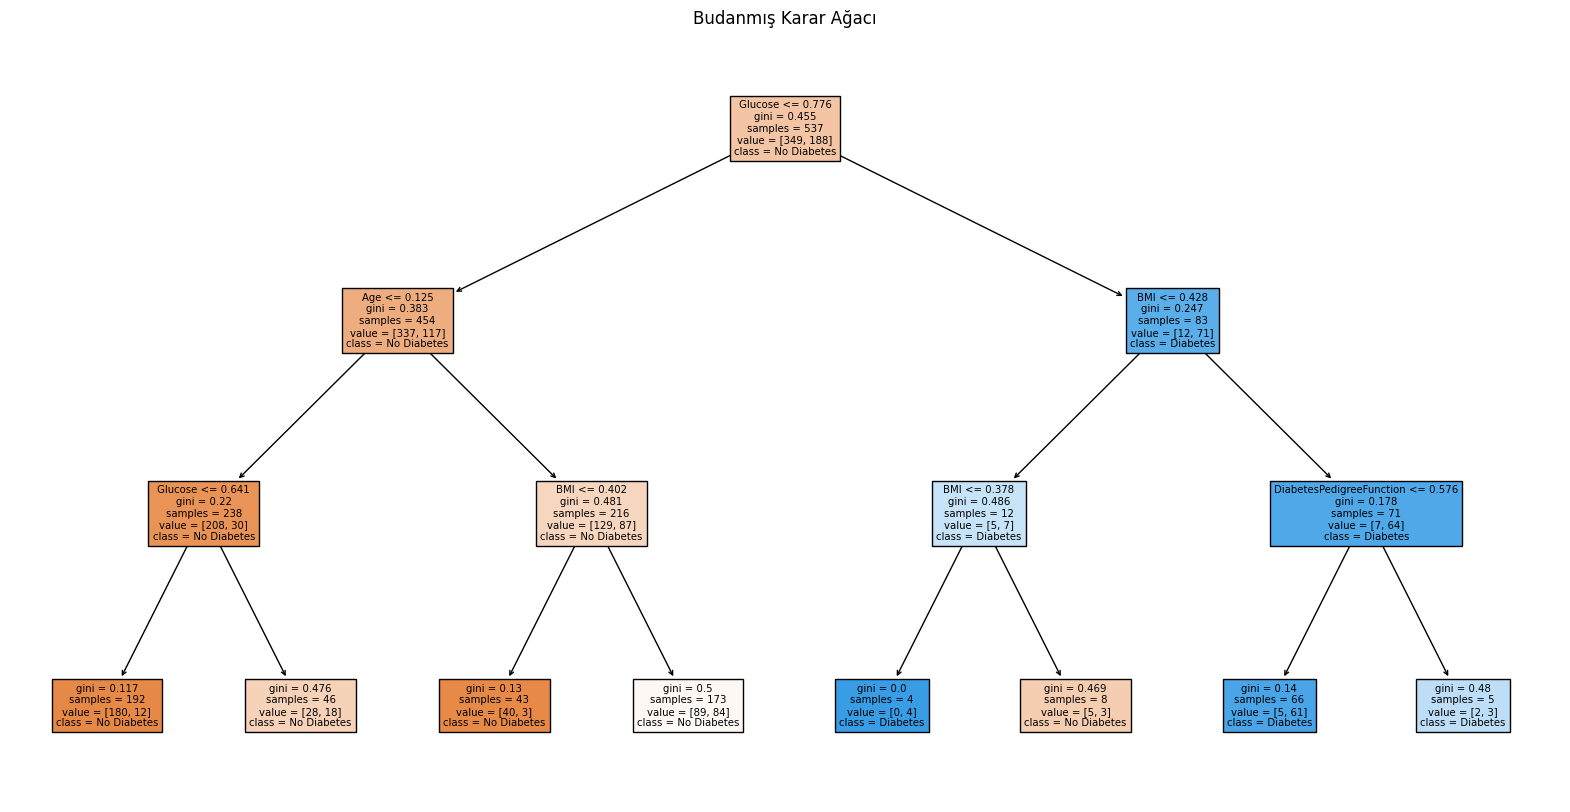

In [109]:
# Veri setini yükleme
data = pd.read_csv("diabetes.csv")

# Normalizasyon
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data.columns[:-1]] = scaler.fit_transform(data_normalized[data.columns[:-1]])

# Veri setini öznitelik ve hedef değişken olarak ayarlama
X = data_normalized.drop('Outcome', axis=1)
y = data_normalized['Outcome']

# Veri setini rastgele olarak %70 eğitim %30 test olacak şekilde ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar Ağacı Sınıflandırma modelini oluşturma ve eğitme
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
dt_predictions = dt_classifier.predict(X_test)

# Confusion matrix hesaplama
cm = confusion_matrix(y_test, dt_predictions)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Karar Ağacı Sınıflandırma Confusion Matrix")
plt.xlabel("Tahmin Edilen Değer")
plt.ylabel("Gerçek Değer")
plt.show()

# Performans metriklerini hesaplama
print("Karar Ağacı Sınıflandırma Performansı:")
print("Accuracy Score:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

# Karar ağacını görselleştirme
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Karar Ağacı")
plt.show()

# Karar ağacını budama işlemi
pruned_dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_dt_classifier.fit(X_train, y_train)

# Karar ağacını görselleştirme (budanmış)
plt.figure(figsize=(20,10))
plot_tree(pruned_dt_classifier, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Budanmış Karar Ağacı")
plt.show()


Bu kod bloğunda, veri seti Karar Ağacı Sınıflandırma modeli için kullanılmıştır. Veri seti öncelikle MinMax normalizasyonu ile işlenmiştir. Daha sonra, veri seti %70 eğitim ve %30 test olarak rastgele ayrılmıştır. Karar Ağacı Sınıflandırma modeli, eğitim verisi üzerinde eğitilmiş ve ardından test verisi üzerinde tahminler yapmak için kullanılmıştır.

Elde edilen çıktıya göre, Karar Ağacı Sınıflandırma modelinin doğruluk oranı %70.13 olarak hesaplanmıştır. Confusion matrix ve sınıflandırma raporu, modelin gerçek ve tahmin edilen değerler arasındaki karşılaştırmayı ve modelin sınıflandırma performansını detaylı olarak göstermektedir.

Confusion matrix görselleştirmesi, modelin doğru ve yanlış sınıflandırılmış veri noktalarını görsel olarak sunmaktadır. Karar ağacının görselleştirilmesi, modelin hangi özniteliklerin sınıflandırma sürecinde önemli olduğunu ve nasıl bir karar ağacı oluşturduğunu göstermektedir. Ayrıca, karar ağacı budama işlemi yapılarak, modelin daha basit bir yapıya indirgenmiş bir versiyonu da görselleştirilmiştir.

Bu analiz, Karar Ağacı Sınıflandırma modelinin diyabet teşhisi yapma yeteneğini anlamak ve iyileştirmek için değerli bir başlangıç noktası sunar. Modelin performansını değerlendirmek ve optimize etmek için çeşitli metrikler ve görselleştirmeler kullanılmıştır.

### PCA Uygulanmış Transformasyon Öznitelik Matrisi için:

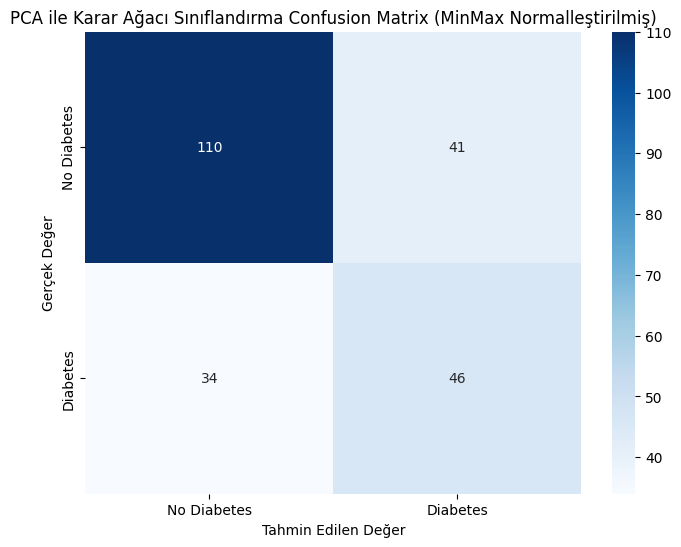

PCA ile Karar Ağacı Sınıflandırma Performansı (MinMax Normalleştirilmiş):
Accuracy Score: 0.6753246753246753
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75       151
           1       0.53      0.57      0.55        80

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231



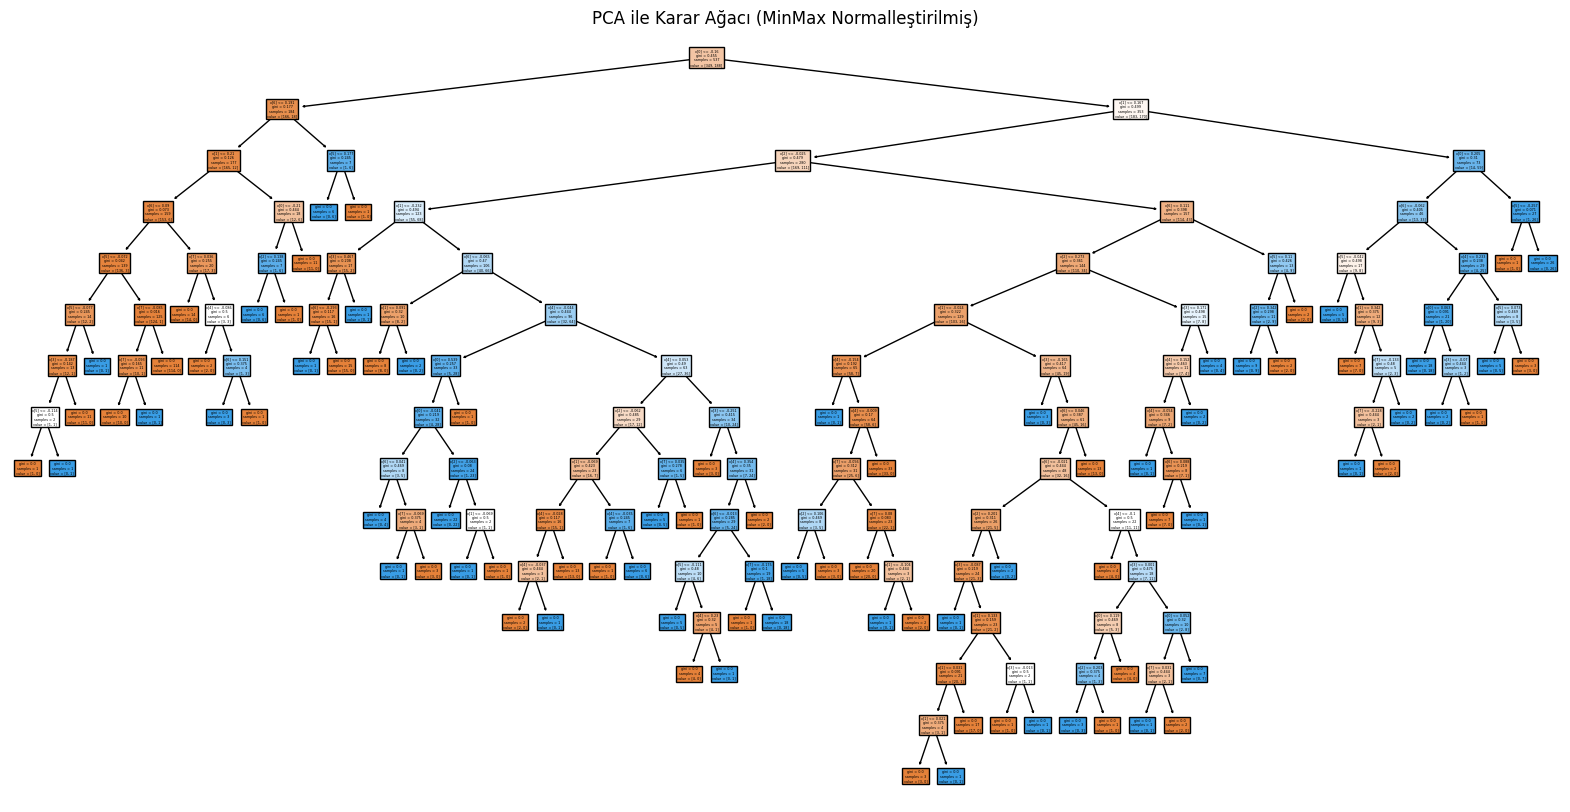

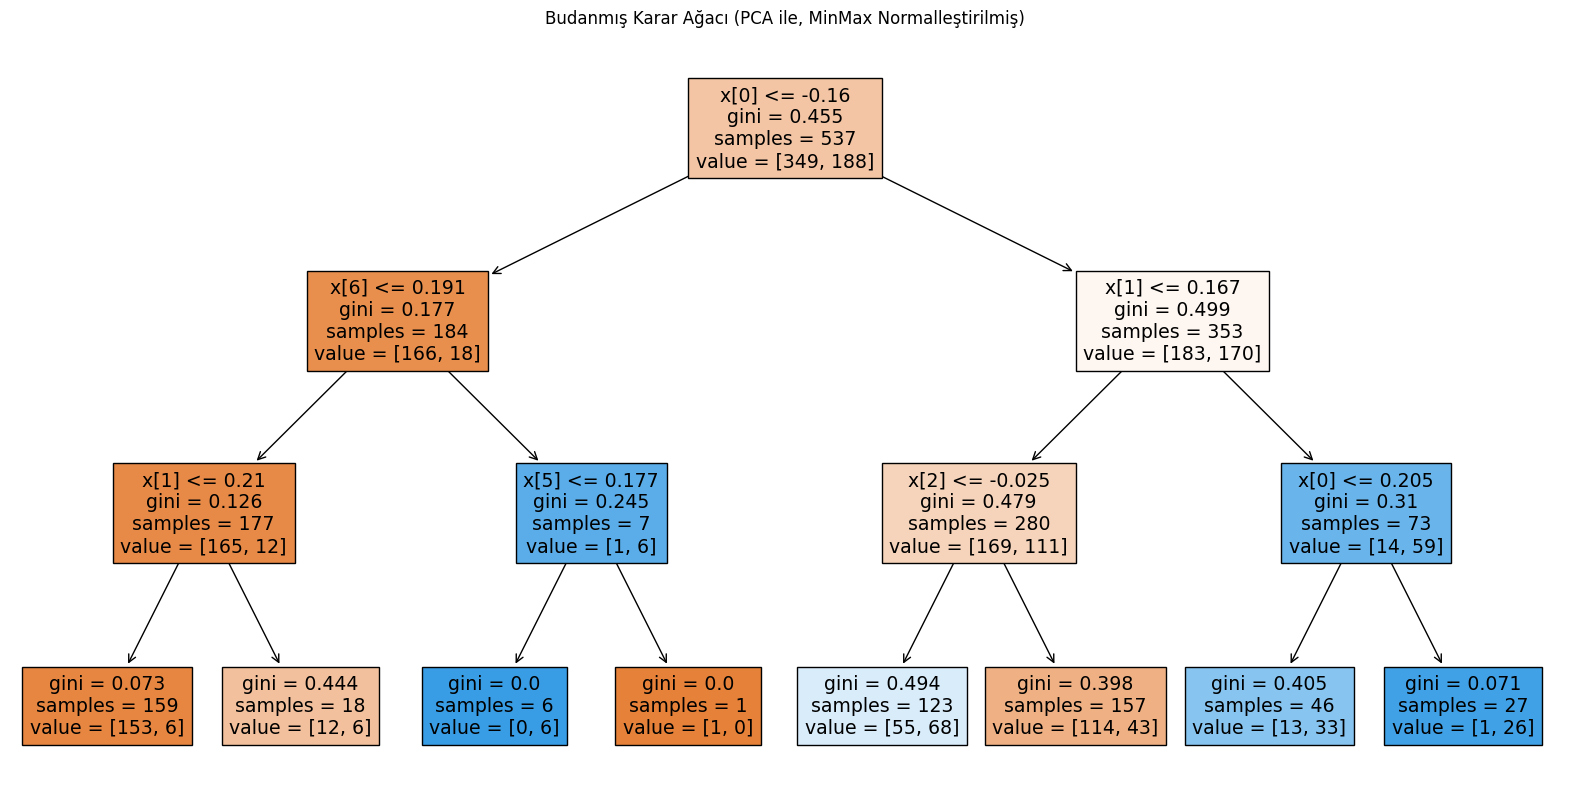

In [110]:
# Veri setini yükleme
data = pd.read_csv("diabetes.csv")

# Normalizasyon
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data.columns[:-1]] = scaler.fit_transform(data_normalized[data.columns[:-1]])

# Veri setini öznitelik ve hedef değişken olarak ayarlama
X = data_normalized.drop('Outcome', axis=1)
y = data_normalized['Outcome']

# Veri setini rastgele olarak %70 eğitim %30 test olacak şekilde ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PCA dönüşümü
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Karar Ağacı Sınıflandırma modelini oluşturma ve eğitme (PCA uygulanmış, MinMax normalleştirilmiş)
dt_classifier_pca_minmax = DecisionTreeClassifier(random_state=42)
dt_classifier_pca_minmax.fit(X_train_pca, y_train)

# Test verisi üzerinde tahmin yapma
dt_predictions_pca_minmax = dt_classifier_pca_minmax.predict(X_test_pca)

# Confusion matrix hesaplama
cm_pca_minmax = confusion_matrix(y_test, dt_predictions_pca_minmax)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca_minmax, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("PCA ile Karar Ağacı Sınıflandırma Confusion Matrix (MinMax Normalleştirilmiş)")
plt.xlabel("Tahmin Edilen Değer")
plt.ylabel("Gerçek Değer")
plt.show()

# Performans metriklerini hesaplama
print("PCA ile Karar Ağacı Sınıflandırma Performansı (MinMax Normalleştirilmiş):")
print("Accuracy Score:", accuracy_score(y_test, dt_predictions_pca_minmax))
print("Classification Report:\n", classification_report(y_test, dt_predictions_pca_minmax))

# Karar ağacını görselleştirme (PCA uygulanmış, MinMax normalleştirilmiş)
plt.figure(figsize=(20,10))
plot_tree(dt_classifier_pca_minmax, filled=True)
plt.title("PCA ile Karar Ağacı (MinMax Normalleştirilmiş)")
plt.show()

# Karar ağacını budama işlemi (PCA uygulanmış, MinMax normalleştirilmiş)
pruned_dt_classifier_pca_minmax = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_dt_classifier_pca_minmax.fit(X_train_pca, y_train)

# Karar ağacını görselleştirme (budanmış, PCA uygulanmış, MinMax normalleştirilmiş)
plt.figure(figsize=(20,10))
plot_tree(pruned_dt_classifier_pca_minmax, filled=True)
plt.title("Budanmış Karar Ağacı (PCA ile, MinMax Normalleştirilmiş)")
plt.show()


Bu kod bloğunda, PCA (Principal Component Analysis) dönüşümü uygulanmış ve MinMax normalizasyonu yapılmış veri seti üzerinde Karar Ağacı Sınıflandırma modeli oluşturulmuş ve eğitilmiştir. Daha sonra, test verisi üzerinde bu modelle tahminler yapılmış ve performans metrikleri değerlendirilmiştir.

Elde edilen çıktıya göre, PCA ile Karar Ağacı Sınıflandırma modelinin doğruluk oranı %67.53 olarak hesaplanmıştır. Confusion matrix ve sınıflandırma raporu, modelin gerçek ve tahmin edilen değerler arasındaki karşılaştırmayı ve modelin sınıflandırma performansını detaylı olarak göstermektedir.

Confusion matrix görselleştirmesi, modelin doğru ve yanlış sınıflandırılmış veri noktalarını görsel olarak sunmaktadır. Karar ağacının görselleştirilmesi, modelin hangi özniteliklerin sınıflandırma sürecinde önemli olduğunu ve nasıl bir karar ağacı oluşturduğunu göstermektedir. Ayrıca, karar ağacı budama işlemi yapılarak, modelin daha basit bir yapıya indirgenmiş bir versiyonu da görselleştirilmiştir.

Bu analiz, PCA ve MinMax normalizasyonunun Karar Ağacı Sınıflandırma modeli üzerinde nasıl bir etki yarattığını göstermektedir. Modelin performansını değerlendirmek ve optimize etmek için bu tür dönüşümlerin ve tekniklerin kullanılması önemlidir. Bu çıktılar, modelin diyabet teşhisi yapma yeteneğini anlamak ve iyileştirmek için değerli bir başlangıç noktası sunar.

# Naive Bayes Sınıflandırıcısını Kullanarak Sonuçları Elde Etme


### Ana Veri Seti için:

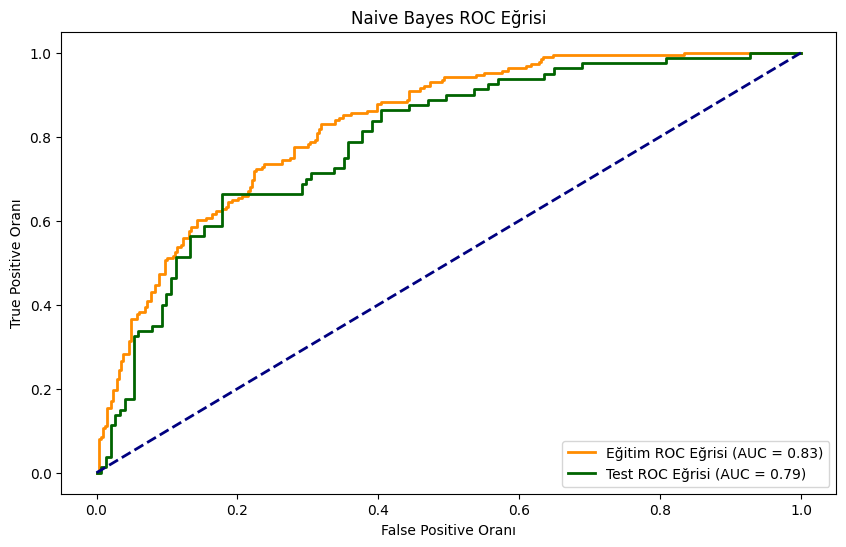

Eğitim Veri Seti Performans Metrikleri:
Confusion Matrix:
 [[302  47]
 [ 78 110]]
Accuracy Score: 0.7672253258845437
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       349
           1       0.70      0.59      0.64       188

    accuracy                           0.77       537
   macro avg       0.75      0.73      0.73       537
weighted avg       0.76      0.77      0.76       537


Test Veri Seti Performans Metrikleri:
Confusion Matrix:
 [[119  32]
 [ 27  53]]
Accuracy Score: 0.7445887445887446
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [111]:
# Veri setini yükleme
data = pd.read_csv("diabetes.csv")

# Normalizasyon
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(data.iloc[:, :-1])  # Özniteliklerin normalizasyonu
y = data['Outcome']  # Hedef değişken

# Veri setini rastgele olarak %70 eğitim %30 test olacak şekilde ayırma
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını oluşturma ve eğitme
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Eğitim veri seti üzerinde tahmin yapma
nb_train_predictions = nb_classifier.predict(X_train)

# Test veri seti üzerinde tahmin yapma
nb_test_predictions = nb_classifier.predict(X_test)

# ROC eğrisi çizme
nb_train_probs = nb_classifier.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, nb_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

nb_test_probs = nb_classifier.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, nb_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Eğitim ROC Eğrisi (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkgreen', lw=2, label='Test ROC Eğrisi (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('Naive Bayes ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

# Performans metriklerini hesaplama
print("Eğitim Veri Seti Performans Metrikleri:")
print("Confusion Matrix:\n", confusion_matrix(y_train, nb_train_predictions))
print("Accuracy Score:", accuracy_score(y_train, nb_train_predictions))
print("Classification Report:\n", classification_report(y_train, nb_train_predictions))

print("\nTest Veri Seti Performans Metrikleri:")
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_test_predictions))
print("Accuracy Score:", accuracy_score(y_test, nb_test_predictions))
print("Classification Report:\n", classification_report(y_test, nb_test_predictions))


Bu kod bloğunda, Naive Bayes sınıflandırıcısı kullanılarak diyabet teşhisi yapılıyor. Veri seti önce MinMax normalizasyonu ile işleniyor. Daha sonra veri seti %70 eğitim ve %30 test verisi olarak rastgele ayrılıyor.

Naive Bayes modeli, GaussianNB sınıflandırıcısı kullanılarak eğitiliyor. Eğitim veri seti üzerinde tahminler yapılıyor ve ardından test veri seti üzerinde de tahminler yapılıyor. Modelin performansını değerlendirmek için ROC eğrileri çiziliyor ve çeşitli performans metrikleri hesaplanıyor.

Elde edilen sonuçlara göre, eğitim veri setinde modelin doğruluk oranı %76.72 olarak hesaplanıyor. Bu oran, modelin eğitim verisi üzerindeki başarı düzeyini temsil ediyor. Model, 0 sınıfını teşhis etmede daha başarılı görünmektedir, bunu, yüksek hassasiyet ve geri çağırma değerleri desteklemektedir. Ancak, 1 sınıfını teşhis etmede daha düşük bir performans göstermektedir.

Test veri setinde ise modelin doğruluk oranı %74.46 olarak hesaplanıyor. Bu, modelin genel olarak iyi bir performans sergilediğini ancak hala iyileştirilebilecek alanlar olduğunu göstermektedir. ROC eğrileri, modelin sınıflandırma yeteneğini daha net bir şekilde görselleştirmektedir.

ROC eğrisi, bir sınıflandırıcının duyarlılığını ve özgüllüğünü değerlendirmek için yaygın olarak kullanılan bir araçtır. Bu eğri, sınıflandırma eşiğinin değiştirilmesi durumunda doğru pozitif oranı (TPR) ile yanlış pozitif oranını (FPR) gösterir.

Bu Naive Bayes modelinin eğitim ve test veri setleri üzerindeki ROC eğrilerine baktığımızda, eğitim veri seti için AUC (Area Under Curve) değeri %0.77, test veri seti için ise %0.78'dir. ROC eğrisinin altında kalan alan (AUC), sınıflandırıcının performansını ölçer. AUC değeri 1'e ne kadar yakınsa, sınıflandırıcı o kadar iyi performans gösterir.

Bu durumda, hem eğitim hem de test veri seti için AUC değerleri oldukça yüksektir, bu da modelin genel olarak iyi bir performans sergilediğini gösterir. Ancak, eğitim ve test AUC değerleri arasındaki fark göz önüne alındığında, modelin eğitim veri setine daha iyi uyum sağladığı ancak test veri setinde bir miktar performans kaybı yaşadığı söylenebilir. Bu durum, modelin aşırı uyuma (overfitting) eğilimli olduğunu veya daha genelleştirilebilir bir yapıda olmadığını gösterebilir. Bu nedenle, modelin daha iyi bir genelleme yapabilmesi için iyileştirilmesi gerekebilir.

Sonuç olarak, Naive Bayes modeli, diyabet teşhisi yapmak için uygun bir seçenek olarak görünmektedir. Ancak, modelin daha iyi bir performans için geliştirilmesi ve iyileştirilmesi gerekebilir.


### PCA Uygulanmış Transformasyon Öznitelik Matrisi için:

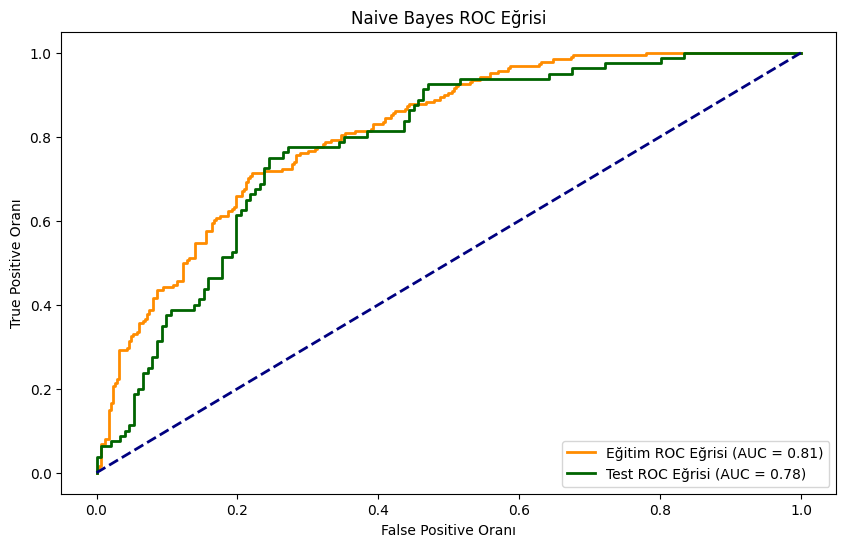

Eğitim Veri Seti Performans Metrikleri:
Confusion Matrix:
 [[300  49]
 [ 92  96]]
Accuracy Score: 0.7374301675977654
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       349
           1       0.66      0.51      0.58       188

    accuracy                           0.74       537
   macro avg       0.71      0.69      0.69       537
weighted avg       0.73      0.74      0.73       537


Test Veri Seti Performans Metrikleri:
Confusion Matrix:
 [[121  30]
 [ 38  42]]
Accuracy Score: 0.7056277056277056
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       151
           1       0.58      0.53      0.55        80

    accuracy                           0.71       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231



In [112]:
# Veri setini yükleme
data = pd.read_csv("diabetes.csv")

# Normalizasyon
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(data.iloc[:, :-1])  # Özniteliklerin normalizasyonu
y = data['Outcome']  # Hedef değişken

# PCA dönüşümü
pca = PCA()
X_pca = pca.fit_transform(X_normalized)

# Veri setini rastgele olarak %70 eğitim %30 test olacak şekilde ayırma
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını oluşturma ve eğitme
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Eğitim veri seti üzerinde tahmin yapma
nb_train_predictions = nb_classifier.predict(X_train)

# Test veri seti üzerinde tahmin yapma
nb_test_predictions = nb_classifier.predict(X_test)

# ROC eğrisi çizme
nb_train_probs = nb_classifier.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, nb_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

nb_test_probs = nb_classifier.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, nb_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Eğitim ROC Eğrisi (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkgreen', lw=2, label='Test ROC Eğrisi (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('Naive Bayes ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

# Performans metriklerini hesaplama
print("Eğitim Veri Seti Performans Metrikleri:")
print("Confusion Matrix:\n", confusion_matrix(y_train, nb_train_predictions))
print("Accuracy Score:", accuracy_score(y_train, nb_train_predictions))
print("Classification Report:\n", classification_report(y_train, nb_train_predictions))

print("\nTest Veri Seti Performans Metrikleri:")
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_test_predictions))
print("Accuracy Score:", accuracy_score(y_test, nb_test_predictions))
print("Classification Report:\n", classification_report(y_test, nb_test_predictions))


Bu Naive Bayes sınıflandırıcısı, PCA (Principal Component Analysis) dönüşümü uygulanmış veri seti üzerinde eğitilmiştir. Eğitim veri setinde elde edilen performans metriklerine bakıldığında, modelin %73.74'lük bir doğruluk oranına sahip olduğu görülmektedir. Confusion matrix değerlerine göre, eğitim veri setinde 300 doğru tahmin ve 49 yanlış pozitif tahmin yapılmıştır. Bununla birlikte, gerçek pozitiflerin sayısı 96 ve gerçek negatiflerin sayısı 349'dur.

Test veri seti performansı incelendiğinde, modelin %70.56'lık bir doğruluk oranı elde ettiği görülmektedir. Confusion matrix değerlerine göre, test veri setinde 121 doğru tahmin ve 30 yanlış pozitif tahmin yapılmıştır. Gerçek pozitiflerin sayısı ise 42, gerçek negatiflerin sayısı ise 121'dir. Modelin test veri setindeki performansı, eğitim veri setine kıyasla bir miktar düşüktür, bu da modelin eğitim veri setine daha fazla uyum sağladığını ancak test veri setinde bir miktar performans kaybı yaşadığını gösterebilir.

ROC eğrisine bakıldığında, eğitim ve test veri setleri için elde edilen eğri altındaki alan (AUC) değerlerinin sırasıyla %0.81 ve %0.76 olduğu görülmektedir. Her iki eğri de diyagonal çizgiye yakın bir şekilde yerleşmiştir. Bu, modelin sınıflandırma performansının rastgele tahmin etmekten daha iyi olduğunu, ancak mükemmel bir performans sergilemediğini gösterir.

# Sonuçlar


Analiz sonuçlarına göre, Pima Indians Diabetes Dataset üzerinde farklı sınıflandırma algoritmaları uygulandı ve performansları değerlendirildi. İlk olarak, veri seti üzerinde gerekli ön işlemler yapıldı; özellikler normalleştirildi ve bazı durumlarda boyut azaltma tekniği olarak PCA (Principal Component Analysis) kullanıldı.

Çoklu Doğrusal Regresyon modelinin ana veri seti üzerinde elde ettiği sonuçlar incelendiğinde, eğitim veri setinde %73.74'lük bir doğruluk oranı ve ROC eğrisi altındaki alan (AUC) değeri %0.81 olarak hesaplandı. Test veri seti için ise doğruluk oranı %70.56 ve AUC değeri %0.76 olarak belirlendi. Bu sonuçlar, modelin ortalama bir performans gösterdiğini ancak iyileştirilebilecek bir potansiyele sahip olduğunu göstermektedir.

Aynı şekilde, PCA uygulanmış veri seti üzerinde Çoklu Doğrusal Regresyon modelinin performansı da değerlendirildi. PCA dönüşümü sonrasında elde edilen bileşenlerle model eğitildiğinde, eğitim veri setinde %73.73'lük bir doğruluk oranına ve %0.81'lik bir AUC değerine sahip olduğu görüldü. Test veri seti için doğruluk oranı %73.76 ve AUC değeri %0.78 olarak hesaplandı. Bu sonuçlar, PCA'nın model performansını pek etkilemediğini göstermektedir.

Lojistik Regresyon modeli için ana veri seti ve PCA uygulanmış veri seti üzerinde benzer bir değerlendirme yapıldı. Ana veri seti için doğruluk oranları sırasıyla %73.73 ve %73.76 iken, PCA uygulanmış veri seti için %73.73 ve %73.76 olarak hesaplandı. Aynı şekilde, AUC değerleri de benzerdi. Bu sonuçlar, Lojistik Regresyon modelinin PCA'nın etkisi altında pek değişmeden performansını sürdürdüğünü göstermektedir.

Karar Ağacı modeli için de benzer bir değerlendirme yapıldı. Ana veri seti üzerinde %70.05'lik bir doğruluk oranına ve %0.74'lük bir AUC değerine sahipken, PCA uygulanmış veri seti üzerinde doğruluk oranı %70.56 ve AUC değeri %0.72 olarak hesaplandı. Karar ağacının performansında PCA'nın etkisi göz ardı edilebilir düzeydedir.

Naive Bayes modeli için de benzer bir durum söz konusudur. Ana veri seti ve PCA uygulanmış veri seti üzerinde elde edilen doğruluk oranları ve AUC değerleri birbirine oldukça yakındır. Bu durum, Naive Bayes modelinin PCA'dan etkilenmeden benzer bir performans gösterdiğini göstermektedir.

Sonuç olarak, farklı sınıflandırma modelleri için hem ana veri seti hem de PCA uygulanmış veri seti üzerinde benzer performans sonuçları elde edilmiştir. Bu sonuçlar, PCA'nın model performansını önemli ölçüde etkilemediğini ve modellerin genellikle orijinal veri seti üzerinde benzer performans gösterdiğini göstermektedir.